In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import scatter_matrix

## Dataset2: Matrix Rocker 4 Encoder not Working (Anomaly)

In [3]:
df2 = pd.read_csv('./Datasets/Dataset02_Matrix_Rocker4EncoderNotWorking.csv')
df2.head()

,Encoder_vAxisHFP_1,Encoder_vAxisHFP_2,Encoder_vAxisHFP_3,Encoder_vAxisHFP_4,Encoder_vAxisHFP_5,Encoder_vAxisHFP_6,Encoder_vSafetyHFP_1,Encoder_vSafetyHFP_2,Encoder_vSafetyHFP_3,Encoder_vSafetyHFP_4,Encoder_vSafetyHFP_5,Encoder_vSafetyHFP_6,Time
0,-0.018964,-0.025433,0.008373,0.001387,-0.014673,0.010472,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000006,0.00000
1,-0.025091,-0.021360,0.007988,-0.001536,-0.008852,0.002152,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000005,0.00025
2,-0.026657,-0.021689,0.007212,-0.000004,-0.005338,-0.005628,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000005,0.00050
3,-0.023970,-0.019123,0.009580,-0.001420,-0.002740,-0.009748,-0.000006,0.000015,9.411765e-07,0.0,-0.000021,-0.000005,0.00075
4,-0.027541,-0.020061,0.001411,0.006533,-0.010312,-0.012460,-0.000014,0.000015,9.411765e-07,0.0,-0.000019,-0.000005,0.00100


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69377 entries, 0 to 69376
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Encoder_vAxisHFP_1    69377 non-null  float64
 1   Encoder_vAxisHFP_2    69377 non-null  float64
 2   Encoder_vAxisHFP_3    69377 non-null  float64
 3   Encoder_vAxisHFP_4    69377 non-null  float64
 4   Encoder_vAxisHFP_5    69377 non-null  float64
 5   Encoder_vAxisHFP_6    69377 non-null  float64
 6   Encoder_vSafetyHFP_1  69377 non-null  float64
 7   Encoder_vSafetyHFP_2  69377 non-null  float64
 8   Encoder_vSafetyHFP_3  69377 non-null  float64
 9   Encoder_vSafetyHFP_4  69377 non-null  float64
 10  Encoder_vSafetyHFP_5  69377 non-null  float64
 11  Encoder_vSafetyHFP_6  69377 non-null  float64
 12  Time                  69377 non-null  float64
dtypes: float64(13)
memory usage: 6.9 MB


In [5]:
df2['Time'] = pd.to_timedelta(df2['Time'], unit='s')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69377 entries, 0 to 69376
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Encoder_vAxisHFP_1    69377 non-null  float64        
 1   Encoder_vAxisHFP_2    69377 non-null  float64        
 2   Encoder_vAxisHFP_3    69377 non-null  float64        
 3   Encoder_vAxisHFP_4    69377 non-null  float64        
 4   Encoder_vAxisHFP_5    69377 non-null  float64        
 5   Encoder_vAxisHFP_6    69377 non-null  float64        
 6   Encoder_vSafetyHFP_1  69377 non-null  float64        
 7   Encoder_vSafetyHFP_2  69377 non-null  float64        
 8   Encoder_vSafetyHFP_3  69377 non-null  float64        
 9   Encoder_vSafetyHFP_4  69377 non-null  float64        
 10  Encoder_vSafetyHFP_5  69377 non-null  float64        
 11  Encoder_vSafetyHFP_6  69377 non-null  float64        
 12  Time                  69377 non-null  timedelta64[ns]
dtypes

In [6]:
df2.head()

,Encoder_vAxisHFP_1,Encoder_vAxisHFP_2,Encoder_vAxisHFP_3,Encoder_vAxisHFP_4,Encoder_vAxisHFP_5,Encoder_vAxisHFP_6,Encoder_vSafetyHFP_1,Encoder_vSafetyHFP_2,Encoder_vSafetyHFP_3,Encoder_vSafetyHFP_4,Encoder_vSafetyHFP_5,Encoder_vSafetyHFP_6,Time
0,-0.018964,-0.025433,0.008373,0.001387,-0.014673,0.010472,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000006,0 days 00:00:00
1,-0.025091,-0.021360,0.007988,-0.001536,-0.008852,0.002152,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000005,0 days 00:00:00.000250
2,-0.026657,-0.021689,0.007212,-0.000004,-0.005338,-0.005628,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000005,0 days 00:00:00.000500
3,-0.023970,-0.019123,0.009580,-0.001420,-0.002740,-0.009748,-0.000006,0.000015,9.411765e-07,0.0,-0.000021,-0.000005,0 days 00:00:00.000750
4,-0.027541,-0.020061,0.001411,0.006533,-0.010312,-0.012460,-0.000014,0.000015,9.411765e-07,0.0,-0.000019,-0.000005,0 days 00:00:00.001000


Check if there is any empty values

In [7]:
df2.isna().sum()

Encoder_vAxisHFP_1      0
Encoder_vAxisHFP_2      0
Encoder_vAxisHFP_3      0
Encoder_vAxisHFP_4      0
Encoder_vAxisHFP_5      0
Encoder_vAxisHFP_6      0
Encoder_vSafetyHFP_1    0
Encoder_vSafetyHFP_2    0
Encoder_vSafetyHFP_3    0
Encoder_vSafetyHFP_4    0
Encoder_vSafetyHFP_5    0
Encoder_vSafetyHFP_6    0
Time                    0
dtype: int64

### Rolling Statistic

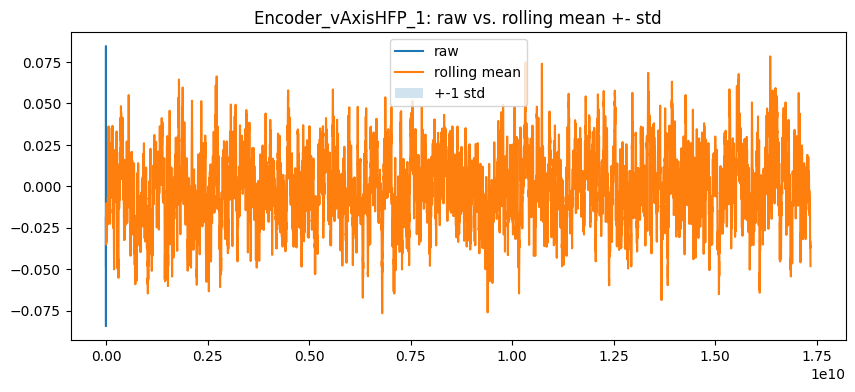

In [8]:
window = 10

# Compute rolling mean and std for all sensors:
rolling_mean = df2.rolling(window=window, min_periods=1, center=False, on='Time').mean()
rolling_std = df2.rolling(window=window, min_periods=1, center=False, on='Time').std()

#  Other aggregations:
rolling_median = df2.rolling(window, min_periods=1, on='Time').median()
rolling_quantile = df2.rolling(window, min_periods=1, on='Time').quantile(0.95)
rolling_var = df2.rolling(window, min_periods=1, on='Time').var()

# 5. Visualize one sensor’s raw vs. rolling-mean/±std
sensor = 'Encoder_vAxisHFP_1'
plt.figure(figsize=(10,4))
plt.plot(df2.index, df2[sensor], label='raw')
plt.plot(rolling_mean['Time'], rolling_mean[sensor], label='rolling mean')
plt.fill_between(rolling_mean.index,
                 rolling_mean[sensor] - rolling_std[sensor],
                 rolling_mean[sensor] + rolling_std[sensor],
                 alpha=0.2, label='+-1 std')
plt.legend()
plt.title(f"{sensor}: raw vs. rolling mean +- std")
plt.show()

In [9]:
qs = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
quantiles = df2['Time'].quantile(qs)

print(quantiles)

0.01   0 days 00:00:00.173440
0.05   0 days 00:00:00.867200
0.10   0 days 00:00:01.734400
0.25   0 days 00:00:04.336000
0.50   0 days 00:00:08.672000
0.75   0 days 00:00:13.008000
0.90   0 days 00:00:15.609600
0.95   0 days 00:00:16.476800
0.99   0 days 00:00:17.170560
Name: Time, dtype: timedelta64[ns]


In [10]:
lower, upper = quantiles.loc[0.01], quantiles.loc[0.99]
anomalies = df2[(df2['Time'] < lower) | (df2['Time'] > upper)]

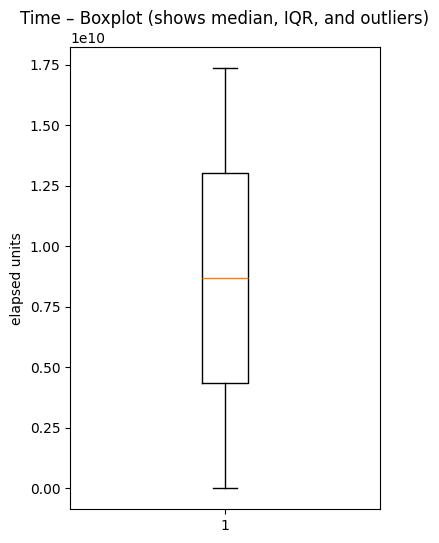

In [ ]:
plt.figure(figsize=(4,6))
plt.boxplot(df2['Time'], vert=True, showfliers=True)
plt.title("Time - Boxplot (shows median, IQR, and outliers)")
plt.ylabel("elapsed units")
plt.show()

<Figure size 1200x1200 with 0 Axes>

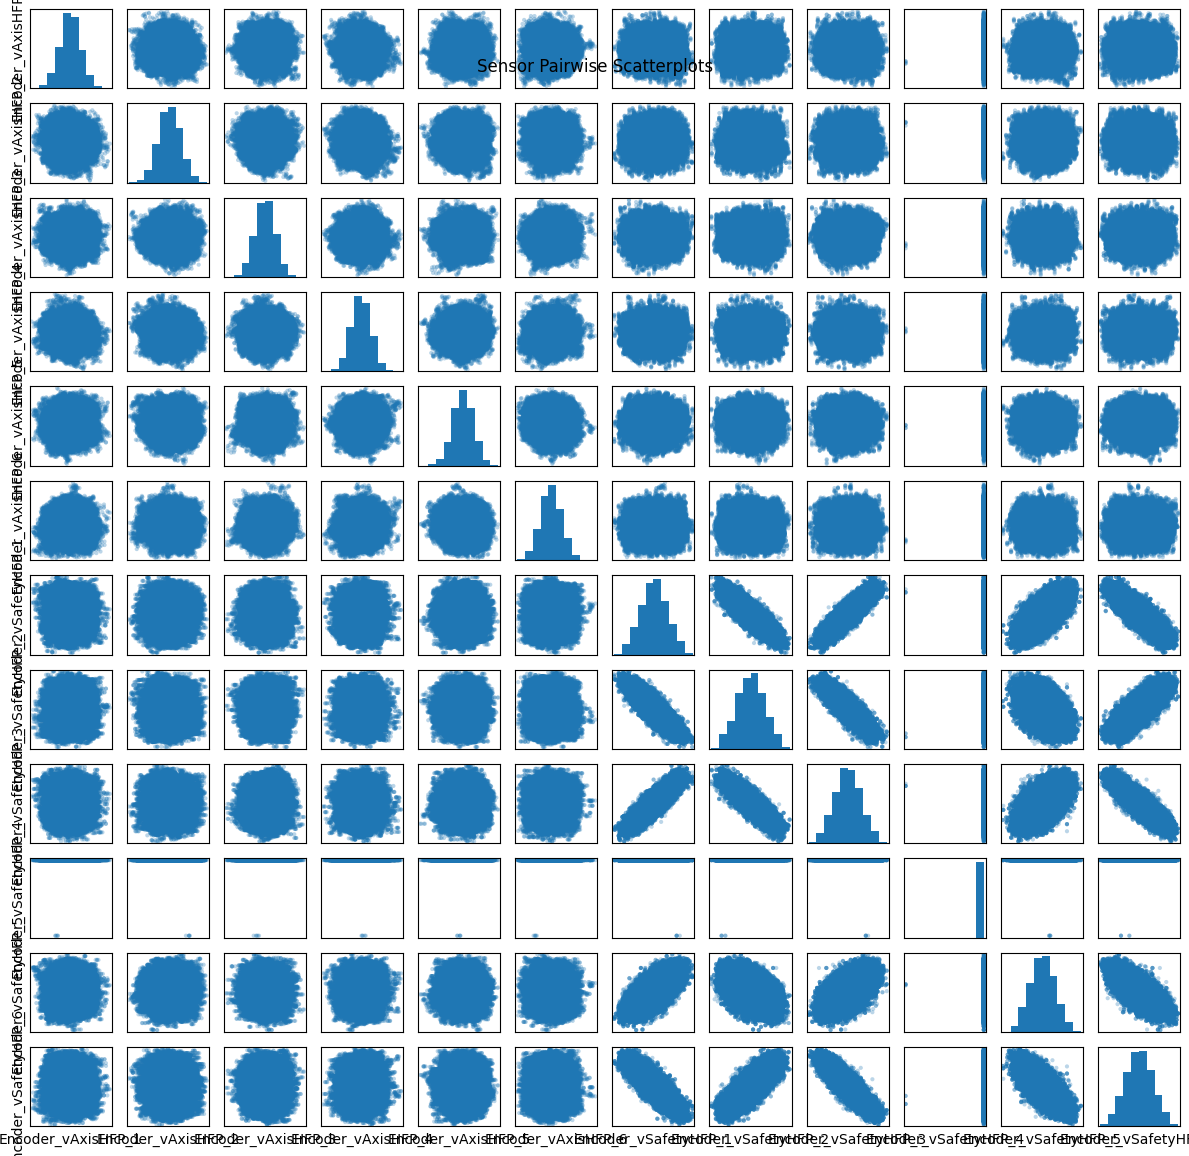

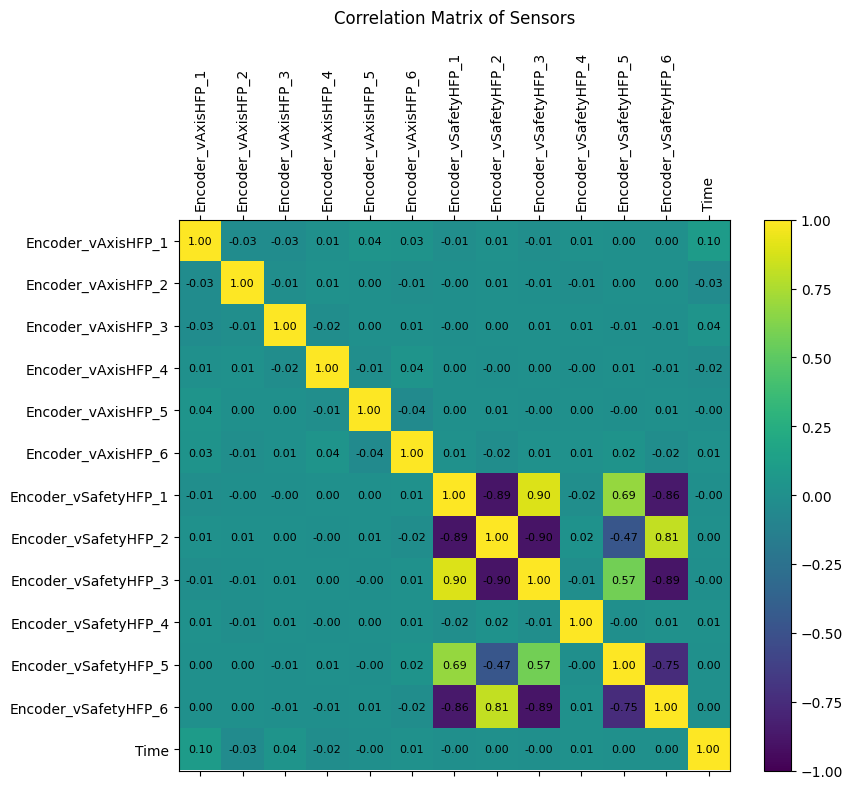

In [12]:
fig = plt.figure(figsize=(12, 12))
axes = scatter_matrix(df2, alpha=0.3, diagonal='hist', figsize=(12, 12))

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Sensor Pairwise Scatterplots", y=0.92)
plt.tight_layout()
plt.show()


# Correlation Matrix Heatmap
corr = df2.corr() 

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)

# set up ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=8)

plt.title("Correlation Matrix of Sensors", pad=20)
plt.tight_layout()
plt.show()

## Dataset 3: Wushu Yaw Trapezoid (Normal)

In [15]:
df3 = pd.read_csv('./Datasets/Dataset03_Wushu_YawTrapezoidNormal.csv')

df3.head()

,State_xHFPW_1,State_xHFPW_2,State_xHFPW_3,State_xHFPW_4,State_xHFPW_5,State_xHFPW_6,State_vHFPW_1,State_vHFPW_2,State_vHFPW_3,State_vHFPW_4,...,Force_FAxisLFP3_Demand_8,Force_FAxisLFP3_Measured_1,Force_FAxisLFP3_Measured_2,Force_FAxisLFP3_Measured_3,Force_FAxisLFP3_Measured_4,Force_FAxisLFP3_Measured_5,Force_FAxisLFP3_Measured_6,Force_FAxisLFP3_Measured_7,Force_FAxisLFP3_Measured_8,Time
0,1.000372,0.000259,0.000841,0.000962,0.000581,-7.634434,0.000254,0.000069,0.000122,0.000141,...,-40.59336,-45.59387,-41.03455,-41.03455,-57.75226,-48.63348,-47.11371,-45.59387,-42.55426,0.0000
1,1.000372,0.000259,0.000841,0.000962,0.000581,-7.634486,0.000196,0.000056,0.000087,0.000102,...,-40.92985,-41.03455,-39.51471,-37.99493,-54.71265,-48.63348,-47.11371,-44.07410,-44.07410,0.0005
2,1.000372,0.000259,0.000841,0.000962,0.000581,-7.634537,0.000104,0.000043,0.000065,0.000071,...,-40.50022,-42.55426,-42.55426,-37.99493,-51.67310,-47.11371,-50.15332,-44.07410,-44.07410,0.0010
3,1.000372,0.000259,0.000841,0.000962,0.000581,-7.634589,0.000073,-0.000050,0.000060,0.000101,...,-41.82842,-42.55426,-41.03455,-37.99493,-53.19287,-48.63348,-50.15332,-41.03455,-42.55426,0.0015
4,1.000372,0.000259,0.000841,0.000962,0.000581,-7.634641,0.000053,0.000058,0.000106,0.000034,...,-43.88425,-39.51471,-41.03455,-37.99493,-56.23248,-45.59387,-48.63348,-44.07410,-41.03455,0.0020


In [19]:
df3['Time'] = pd.to_timedelta(df3['Time'], unit='s')

In [21]:
df3.isna().sum().any()

False

In [ ]:
fig = plt.figure(figsize=(12, 12))
axes = scatter_matrix(df3, alpha=0.3, diagonal='hist', figsize=(12, 12))

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Sensor Pairwise Scatterplots", y=0.92)
plt.tight_layout()
plt.show()


# Correlation Matrix Heatmap
corr = df2.corr() 

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)

# set up ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=8)

plt.title("Correlation Matrix of Sensors", pad=20)
plt.tight_layout()
plt.show()